In [1]:
from tensorflow.examples.tutorials.mnist import input_data

import glob
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

### FID Heat Map

In [2]:
vae_fid_scores = np.load("fid_scores_vae.npy")
vae_fid_scores.shape

(9,)

In [3]:
rvae_fid_scores = np.load("fid_scores_rvae.npy")
rvae_fid_scores.shape

(10, 9)

In [4]:
lambdas = [1,5,10,15,20,25,50,70,100,250]
noise_factors = [round(0.1*i,1) for i in range(1,10)]

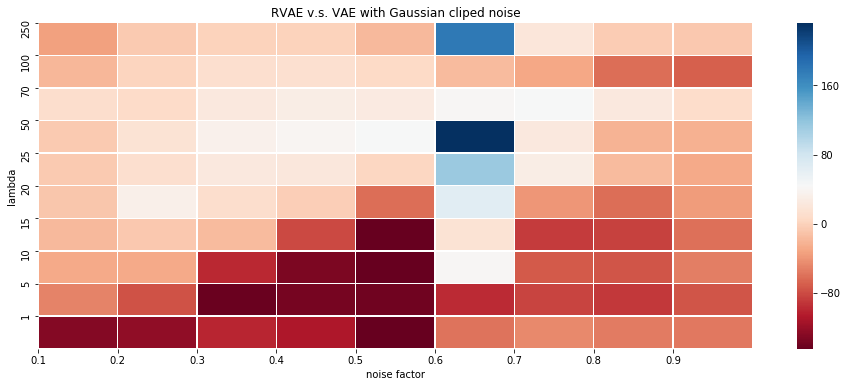

In [5]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap((vae_fid_scores - rvae_fid_scores)[::-1], linewidth=0.5,cmap="RdBu") #bwr

plt.xlabel("noise factor")
plt.ylabel("lambda")
plt.yticks(range(len(lambdas)),lambdas[::-1])
plt.xticks(range(len(noise_factors)),noise_factors)
plt.title("RVAE v.s. VAE with Gaussian cliped noise")

# plt.savefig("fid_heatmap.png")
plt.show()

### VAE vs. RVAE with Bar Plot

In [6]:
# find the best lambda, i.e. the minimum average fid scores across noise factors
a = [i.mean() for i in rvae_fid_scores]
a.index(np.array(a).min())

6

In [7]:
print(lambdas[6])
rvae_fid_scores[6]

50


array([  80.30911135,   92.44873952,  104.19395377,  114.16767448,
        117.34559913,  132.597737  ,  345.16858044,  372.26714225,
        374.04703268])

In [8]:
vae_fid_scores

array([  74.88763376,  109.04261739,  138.04759985,  154.50154932,
        162.15517079,  365.14856679,  369.67180674,  350.21558045,
        350.28284332])

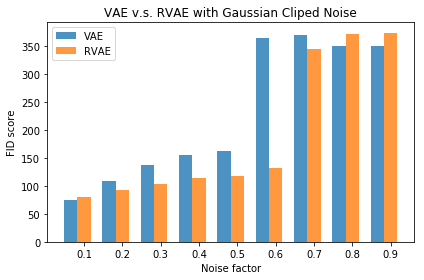

In [9]:
noise_factors = [round(0.1*i,1) for i in range(1,10)]
# create plot
fig, ax = plt.subplots()
index = np.arange(len(noise_factors))
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, vae_fid_scores, bar_width,
                 alpha=opacity, label='VAE')
 
rects2 = plt.bar(index + bar_width, rvae_fid_scores[6], bar_width,
                 alpha=opacity, label='RVAE')
 
plt.xlabel('Noise factor')
plt.ylabel('FID score')
plt.title('VAE v.s. RVAE with Gaussian Cliped Noise')
plt.xticks(index + bar_width, noise_factors)
plt.legend()
 
plt.tight_layout()
# plt.savefig("../gs_pic/gs_vae_rvae_bar.png")
plt.show()

#### Examples of VAE's and RVAE's generation with 60% noise

In [10]:
def plot(x,name):
    h = w = 28
    # plot of generation
    n = np.sqrt(8).astype(np.int32)
    I_generated = np.empty((h*n, w*n))
    for i in range(n):
        for j in range(n):
            I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = x[i*n+j, :].reshape(28, 28)

    plt.figure(figsize=(4, 4))
    plt.imshow(I_generated, cmap='gray')
    plt.axis('off')
    plt.title(name)
#     plt.savefig("./pic/raw_fm_n09")
    plt.show()

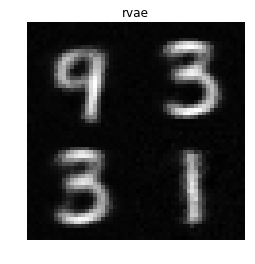

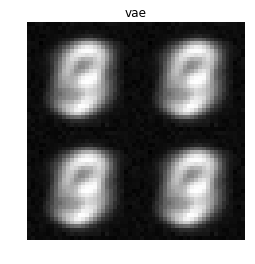

In [11]:
rvae = np.load("./rvae_gs_noise/lambda_50/noise_0.6/generation_fid.npy")[65:]
plot(rvae,"rvae")

vae = np.load("./vae_gs_noise/0.6/generation_fid.npy")
plot(vae,"vae")